# **Finding the best chocolate bars**

## **1. Executive Summary**

The analysis presented here is to find the best chocolate bars. The specific questions explored are:
1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Is the cacao bean's origin an indicator of quality?

## **1.1. The data**

#### Here is a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## **1.2. Key Insights**

- The best chocolate bars only have these three ingredients. Beans, sugar and cocoa.
- Most people have left a review saying: cocoa, sweet, nutty, and creamy.
- Venezuela makes the best chocolate bars.
- Best cocoa content of the bar is 70%.
- Some of the best beans are manufactured in U.S.A.

In [ ]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# reading data
df = pd.read_csv(r'data/chocolate_bars.csv')

In [ ]:
# first five rows
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
# checking columns and rows
df.shape

(2530, 11)

In [ ]:
# checking data type
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [ ]:
# checking for nulls
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().any()

False

## **What is the average rating by country of origin?**

In [ ]:
# average rating by country of origin & top 5
avg_r_country_of_origin = pd.DataFrame(df[['bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('bean_origin').mean()).reset_index()
top_5_country_of_origin = avg_r_country_of_origin.nlargest(5, columns='rating')

# average rating by bar name & top
avg_r_bar_name = pd.DataFrame(df.groupby('bar_name')['rating'].mean().reset_index())
top_5_bar_name = avg_r_bar_name.nlargest(5, columns='rating')

# averate rating by company location & top 5
avg_r_company_location = pd.DataFrame(df[['company_location', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('company_location').mean()).reset_index()
top_5_company_location = avg_r_company_location.nlargest(5, columns='rating')

# average rating by year reviewed
avg_r_year_reviewed = pd.DataFrame(df[['year_reviewed', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('year_reviewed').mean()).reset_index()
top_5_year_reviewed = avg_r_year_reviewed.nlargest(5, columns='rating')

# average rating by cocoa percent
avg_r_cocoa_percent = pd.DataFrame(df[['cocoa_percent', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('cocoa_percent').mean()).reset_index()
top_5_cocoa_percent = avg_r_cocoa_percent.nlargest(5, columns='rating')

# average rating by number of ingredients
avg_r_num_ingredients = pd.DataFrame(df[['num_ingredients', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('num_ingredients').mean()).reset_index()
top_5_num_ingredients = avg_r_num_ingredients.nlargest(5, columns='rating')

# average rating by ingredients
avg_r_ingredients = pd.DataFrame(df[['ingredients', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('ingredients').mean()).reset_index()
top_5_ingredients = avg_r_ingredients.nlargest(5, columns='rating')

# average rating by reviewes
avg_r_reviews = pd.DataFrame(df[['review', 'bean_origin', 'rating']].sort_values('rating', ascending=False).groupby('review').mean()).reset_index()
top_5_reviews = avg_r_reviews.nlargest(5, columns='rating')

# top counting countries
top_counting_countries_labels = ['Madagascar', 'Ecuador', 'Peru', 'Dominican Republic', 'Chuao', 'Venezuela']
top_counting_countries_values = [3.2227272727272727, 3.127906976744186, 2.9207317073170733, 3.0921052631578947, 3.2232142857142856, 3.0238095238095237]
avg_r_country_of_origin_madagascar = df[df['bar_name'] == 'Madagascar']['rating'].mean()
avg_r_country_of_origin_ecuador = df[df['bar_name'] == 'Ecuador']['rating'].mean()
avg_r_country_of_origin_peru = df[df['bar_name'] == 'Peru']['rating'].mean()
avg_r_country_of_origin_domrep = df[df['bar_name'] == 'Dominican Republic']['rating'].mean()
avg_r_country_of_origin_chuao = df[df['bar_name'] == 'Chuao']['rating'].mean()
avg_r_country_of_origin_venezuela = df[df['bar_name'] == 'Venezuela']['rating'].mean()
#print(avg_r_country_of_origin_madagascar)
#print(avg_r_country_of_origin_ecuador)
#print(avg_r_country_of_origin_peru)
#print(avg_r_country_of_origin_domrep)
#print(avg_r_country_of_origin_chuao)
#print(avg_r_country_of_origin_venezuela)

# top counting bean origins
top_counting_origin_labels = ['Venezuela', 'Peru', 'Dominican Republic', 'Ecuador', 'Madagascar', 'Blend']
top_counting_origin_values = [3.231225296442688, 3.1977459016393444, 3.21570796460177, 3.164383561643836, 3.266949152542373, 3.0384615384615383]
avg_r_origin_venezuela = df[df['bean_origin'] == 'Venezuela']['rating'].mean()
#print(avg_r_origin_venezuela)
avg_r_origin_peru = df[df['bean_origin'] == 'Peru']['rating'].mean()
#print(avg_r_origin_peru)
avg_r_origin_demrep = df[df['bean_origin'] == 'Dominican Republic']['rating'].mean()
#print(avg_r_origin_demrep)
avg_r_origin_ecuador = df[df['bean_origin'] == 'Ecuador']['rating'].mean()
#print(avg_r_origin_ecuador)
avg_r_origin_madagascar = df[df['bean_origin'] == 'Madagascar']['rating'].mean()
#print(avg_r_origin_madagascar)
avg_r_origin_blend = df[df['bean_origin'] == 'Blend']['rating'].mean()
#print(avg_r_origin_blend)

# top counting company location
top_counting_location_labels = ['U.S.A.', 'Canada', 'France', 'U.K.', 'Italy', 'Belgium', 'Ecuador', 'Australia', 'Switz.', 'Germany']
top_counting_location_values = [3.190801056338028, 3.303672316384181, 3.258522727272727, 3.069548872180451, 3.230769230769231, 3.1031746031746033,
                               3.038793103448276, 3.358490566037736, 3.3181818181818183, 3.2083333333333335]
avg_r_location_usa = df[df['company_location'] == 'U.S.A.']['rating'].mean()
print(avg_r_location_usa)
avg_r_location_canada = df[df['company_location'] == 'Canada']['rating'].mean()
print(avg_r_location_canada)
avg_r_location_france = df[df['company_location'] == 'France']['rating'].mean()
print(avg_r_location_france)
avg_r_location_uk = df[df['company_location'] == 'U.K.']['rating'].mean()
print(avg_r_location_uk)
avg_r_location_italy = df[df['company_location'] == 'Italy']['rating'].mean()
print(avg_r_location_italy)
avg_r_location_belgium = df[df['company_location'] == 'Belgium']['rating'].mean()
print(avg_r_location_belgium)
avg_r_location_ecuador = df[df['company_location'] == 'Ecuador']['rating'].mean()
print(avg_r_location_ecuador)
avg_r_location_australia = df[df['company_location'] == 'Australia']['rating'].mean()
print(avg_r_location_australia)
avg_r_location_switz = df[df['company_location'] == 'Switzerland']['rating'].mean()
print(avg_r_location_switz)
avg_r_location_germany = df[df['company_location'] == 'Germany']['rating'].mean()
print(avg_r_location_germany)

3.190801056338028
3.303672316384181
3.258522727272727
3.069548872180451
3.230769230769231
3.1031746031746033
3.038793103448276
3.358490566037736
3.3181818181818183
3.2083333333333335


In [ ]:
# Venezuela
list_origin_venco = df[df['bean_origin'] == 'Venezuela']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_venco)
c_yr.most_common(1)
split_result_venco =  (c_yr.most_common(5))
print(split_result_venco)

# Peru
list_origin_peruco = df[df['bean_origin'] == 'Peru']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_peruco)
c_yr.most_common(1)
split_result_peruco =  (c_yr.most_common(5))
split_result_peruco
print(split_result_peruco)

# Dominican Republic
list_origin_domrepco = df[df['bean_origin'] == 'Dominican Republic']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_domrepco)
c_yr.most_common(1)
split_result_domrepco =  (c_yr.most_common(5))
split_result_domrepco
print(split_result_domrepco)

# Ecuador
list_origin_ecuador = df[df['bean_origin'] == 'Ecuador']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_ecuador)
c_yr.most_common(1)
split_result_ecuador =  (c_yr.most_common(5))
split_result_ecuador
print(split_result_ecuador)

# Madagascar
list_origin_madagascar = df[df['bean_origin'] == 'Madagascar']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_madagascar)
c_yr.most_common(1)
split_result_madagascar =  (c_yr.most_common(5))
split_result_madagascar
print(split_result_madagascar)

# Blend
list_origin_blend = df[df['bean_origin'] == 'Blend']['cocoa_percent'].tolist()

c_yr = Counter(list_origin_blend)
c_yr.most_common(1)
split_result_blend =  (c_yr.most_common(5))
split_result_blend
print(split_result_blend)

cocoa_percent_labels_origins = ['70% / Venezuela', '70% / Peru', '70% / Dom. Rep.', '70% / Ecuador', '70% / Madagascar', '70% / Blend']
cocoa_percent_values_origins = [102, 116, 100, 76, 64, 38]

[(70.0, 102), (75.0, 37), (72.0, 33), (74.0, 10), (80.0, 8)]
[(70.0, 116), (75.0, 31), (72.0, 25), (68.0, 10), (73.0, 6)]
[(70.0, 100), (72.0, 28), (75.0, 25), (74.0, 10), (80.0, 8)]
[(70.0, 76), (75.0, 31), (72.0, 17), (85.0, 12), (73.0, 11)]
[(70.0, 64), (72.0, 21), (75.0, 19), (65.0, 9), (64.0, 8)]
[(70.0, 38), (75.0, 17), (72.0, 15), (65.0, 8), (60.0, 8)]


In [ ]:
# bean_origin counter
list_review_origin = df['bean_origin'].tolist()

c_origin = Counter(list_review_origin)
c_origin.most_common(1)
split_result_origin =  (c_origin.most_common(6))

split_result_origin_df = pd.DataFrame(data=split_result_origin, columns=['bean_origin', 'counter'])
split_result_origin_df

,bean_origin,counter
0,Venezuela,253
1,Peru,244
2,Dominican Republic,226
3,Ecuador,219
4,Madagascar,177
5,Blend,156


In [ ]:
# company_location counter
list_review_company = df['company_location'].tolist()

c_company = Counter(list_review_company)
c_company.most_common(1)
split_result_company =  (c_company.most_common(10))

split_result_company_df = pd.DataFrame(data=split_result_company, columns=['company_location', 'counter'])
split_result_company_df

,company_location,counter
0,U.S.A.,1136
1,Canada,177
2,France,176
3,U.K.,133
4,Italy,78
5,Belgium,63
6,Ecuador,58
7,Australia,53
8,Switzerland,44
9,Germany,42


In [ ]:
# review counter
list_review = df['review'].tolist()

split_list_review = [x for xs in list_review for x in xs.split(',')]

c = Counter(split_list_review)
c.most_common(1)
split_result =  (c.most_common(10))

split_result_df = pd.DataFrame(data=split_result, columns=['review', 'counter'])
split_result_df

,review,counter
0,cocoa,210
1,sweet,183
2,nutty,177
3,creamy,163
4,roasty,161
5,earthy,147
6,sandy,145
7,sour,126
8,floral,94
9,sweet,90


In [ ]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
# bar name counter
list_review_b = df['bar_name'].tolist()

c_b = Counter(list_review_b)
c_b.most_common(1)
split_result_b =  (c_b.most_common(6))

split_result_b

[('Madagascar', 55),
 ('Ecuador', 43),
 ('Peru', 41),
 ('Dominican Republic', 38),
 ('Chuao', 28),
 ('Venezuela', 21)]

In [ ]:
# mean rating
means = df.groupby('bean_origin')['rating'].mean()
means

df.groupby('bar_name')['rating'].head()

0       3.25
1       3.50
2       3.75
3       3.00
4       3.00
        ... 
2524    3.75
2525    2.75
2526    3.75
2527    3.00
2528    3.25
Name: rating, Length: 2090, dtype: float64

In [ ]:
# labels
values = avg_r_bar_name['rating']
labels = ['Classic Dark', 'Cocoa Nibs', 'Peace of Wild Things', 'Roasted Cocoa Nibs', 'Heirloom']
labels_cocoa = ['50%', '63%', '66%', '69%', '78%']
labels_num = ['3', '2', '4', '5', '1']

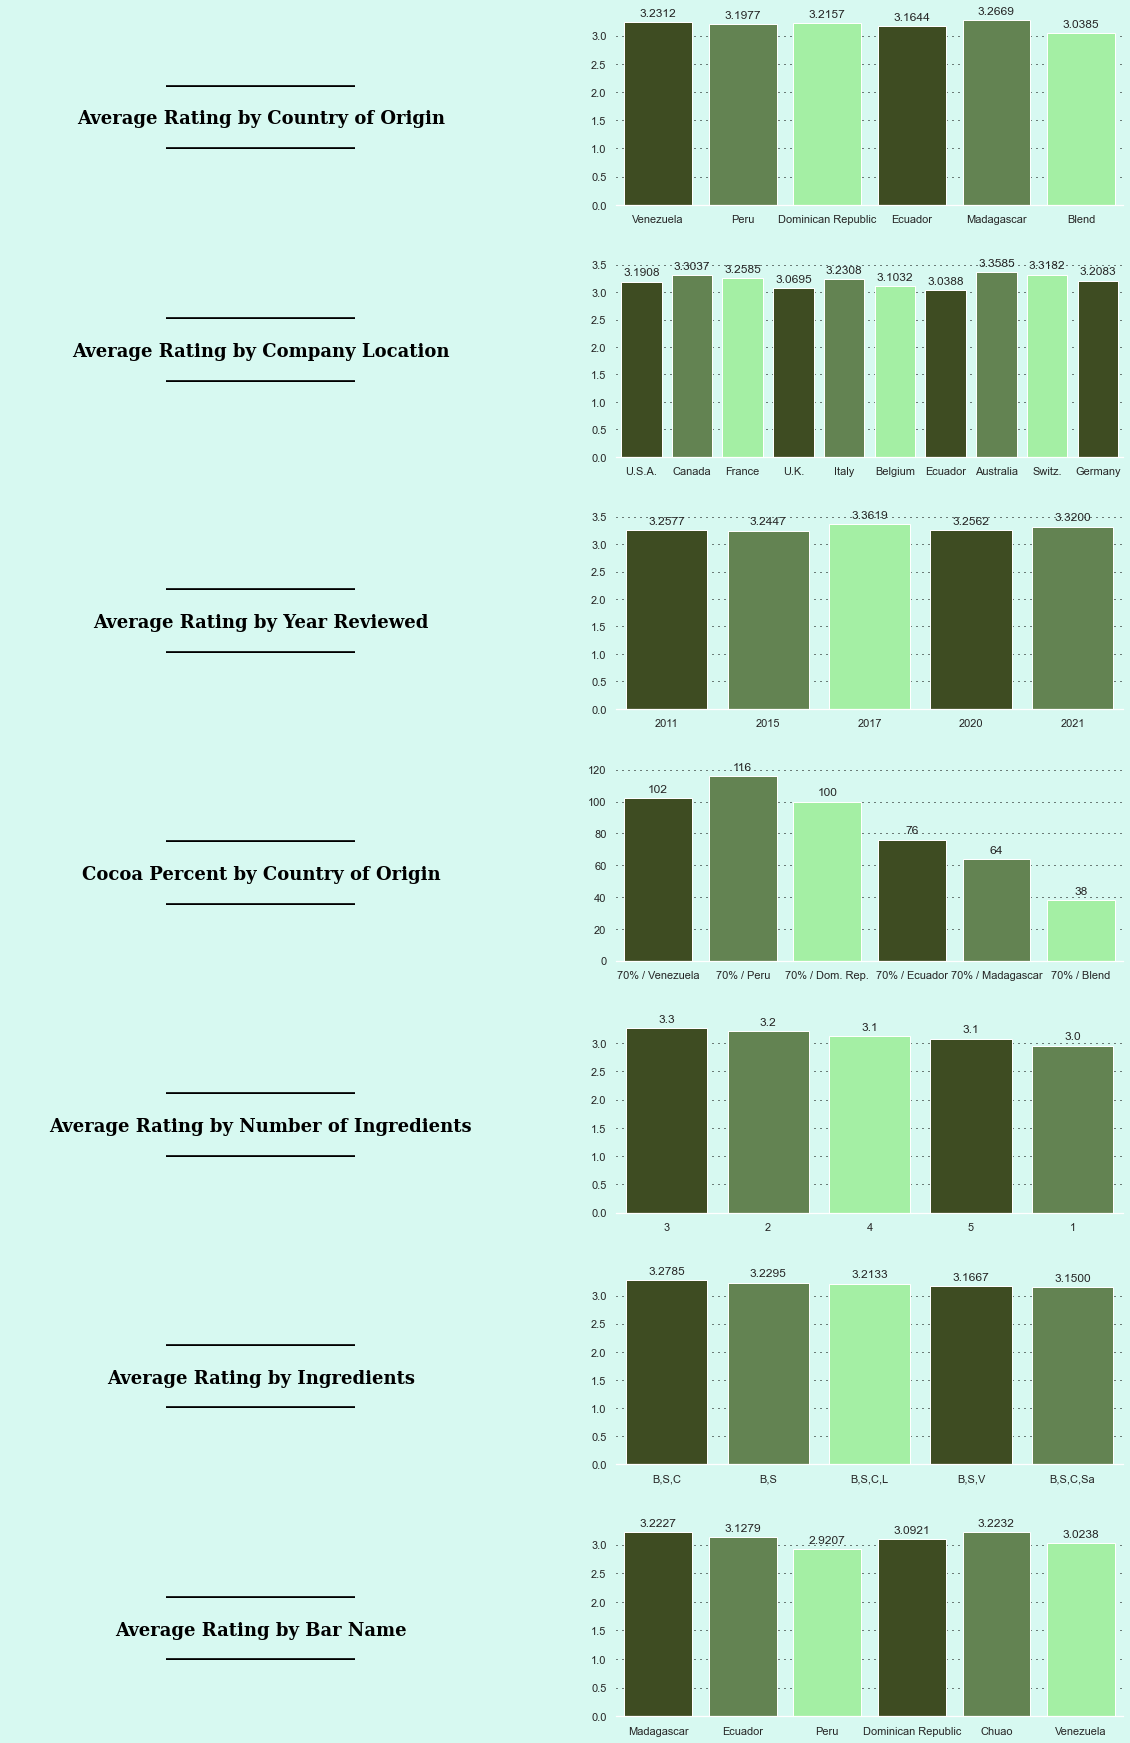

In [ ]:
# subplots
fig = plt.figure(figsize=(20, 36))
gs = fig.add_gridspec(8, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[5, 0])
ax11 = fig.add_subplot(gs[5, 1])
ax12 = fig.add_subplot(gs[6, 0])
ax13 = fig.add_subplot(gs[6, 1])

#colors
background_color = '#D7F9F1'
color_pallete = ['#40531B', '#618B4A', '#98FB98']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)

# Title of the plot
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
        '_____________________\n\nAverage Rating by Country of Origin\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.5, 0.6,
         '_____________________\n\nAverage Rating by Company Location\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.5,
        '_____________________\n\nAverage Rating by Year Reviewed\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax6.spines['bottom'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5, 0.5,
        '_____________________\n\nCocoa Percent by Country of Origin\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax8.spines['bottom'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.5, 0.5,
        '_____________________\n\nAverage Rating by Number of Ingredients\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax10.spines['bottom'].set_visible(False)
ax10.spines['left'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.tick_params(left=False, bottom=False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.text(0.5, 0.5,
        '_____________________\n\nAverage Rating by Ingredients\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax12.spines['bottom'].set_visible(False)
ax12.spines['left'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax12.tick_params(left=False, bottom=False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.text(0.5, 0.5,
        '_____________________\n\nAverage Rating by Bar Name\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Country
ax1.text(1.4, 3.7, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax1, x=top_counting_origin_labels, y=top_counting_origin_values, palette=color_pallete)
ax1.set_xlabel('')
ax1.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


# Company Location
ax3.text(1.4, 3.7, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax3, x=top_counting_location_labels, y=top_counting_location_values, palette=color_pallete)
ax3.set_xlabel('')
ax3.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Year Reviewed
ax5.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax5, data=top_5_year_reviewed, x='year_reviewed', y='rating', palette=color_pallete)
ax5.set_xlabel('')
ax5.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Cocoa Percent
ax7.text(1.4, 4.2, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax7, x=cocoa_percent_labels_origins, y=cocoa_percent_values_origins, palette=color_pallete)
ax7.set_xlabel('')
ax7.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Number of Ingredients
ax9.text(1.4, 4.0, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax9, data=top_5_num_ingredients, x=labels_num, y='rating', palette=color_pallete)
ax9.set_xlabel('')
ax9.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Ingredients
ax11.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax11, data=top_5_ingredients, x='ingredients', y='rating', palette=color_pallete)
ax11.set_xlabel('')
ax11.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Bar Name
ax13.text(1.4, 3.7, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax13, x=top_counting_countries_labels, y=top_counting_countries_values, palette=color_pallete)
ax13.set_xlabel('')
ax13.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
    ax10.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
    ax12.spines[s].set_visible(False)
    ax13.spines[s].set_visible(False)
    
plt.subplots_adjust(hspace=0.3)
ax0.grid(False)
ax2.grid(False)
ax4.grid(False)
ax6.grid(False)
ax8.grid(False)
ax10.grid(False)
ax12.grid(False)

There are a lot of **single rows or at least a couple of rows**, for example, Tobago for the column bean_origin with a rating of **3.25 and 4.00, averaging 3.75**. For that reason, there are a lot of outliers which might throw off the correct average rating and some other things, which I will adress later. I figured I would first count the **top couple most frequent values**, and get the average rating that way, dodging the outliers. **Outliers might be occuring due to lack of data, so keep that in mind.**

### **Average Rating by Country of Origin**
I calculated the average rating by country of origin. We can see that **Venezuela, Peru, Dominican Republic, Ecuador, Madagascar and Blend** are all somewhere between **3.00 and 3.30**. With **highest** being Madagascar with 3.669, and **lowest** Blend with 3.0385.

### **Average Rating by Company Location**
U.S.A. had the highest counting number of 1136, while all the other company locations being below 200. Top 10 company locations are averaging between **3.0 and 3.40**. With **highest** being Australia with 3.3585, and **lowest** Ecuador with 3.0388. Venezuelan chocolate's company locations are from U.S.A, Canada, France, U.K, Italy, Spain and Venezuela. They are all from the top 5 most frequent company locations!

### **Average Rating by Year Reviewed**
**I did not count the top 5 most frequent values**, since the column year_reviewed is normally distributed. The highest average rating year is 2017, with 3.3619, and lowest being 2020 with 3.2562.

### **Cocoa Percent by Country of Origin**
Histogram is normally distributed, however there's a **single** and **highest** row being with the rating 3.75, which is 50%. Therefore, I will count most frequent number of cocoa_percent in the top 6 country of origins. We see that for all the 6 countries, the most frequent percent of cocoa is **70%**, with Peru being the one with the most chocolate with 70%.

### **Average rating by Ingredients.**
- B = Beans,
- S = Sugar,
- S* = Sweetener other than white cane or beet sugar,
- C = Cocoa Butter,
- V = Vanilla,
- L = Lecithin,
- Sa = Salt

We can see that the highest average rating for the number of ingredients is a chocolate with only **3 ingredients**. **Beans, Sugar and Cocoa Butter**. While the lowest average rating has 4 ingredients. **Beans, Sugar, Cocoa Butter, and Salt**. We can see that each of those 5 bars has both Beans and Sugar, which the 2nd highest average rating exactly has.

### **Average Rating by Bar Name**
Other name for this column is specific bean origin. For example, there's a chocolate from Venezuela called **Sur del Lago**, **Anamalai** from India, **Semuliki Forest** from Uganda, **Crillo** from Madagascar, etc. We can see that the specific bean origin matches the the country of origin from our first plot. Both **Chuao**, and **Venezuela** chocolate is exactly from Venezuela! The lowest average rating is 2.9207, Peru.

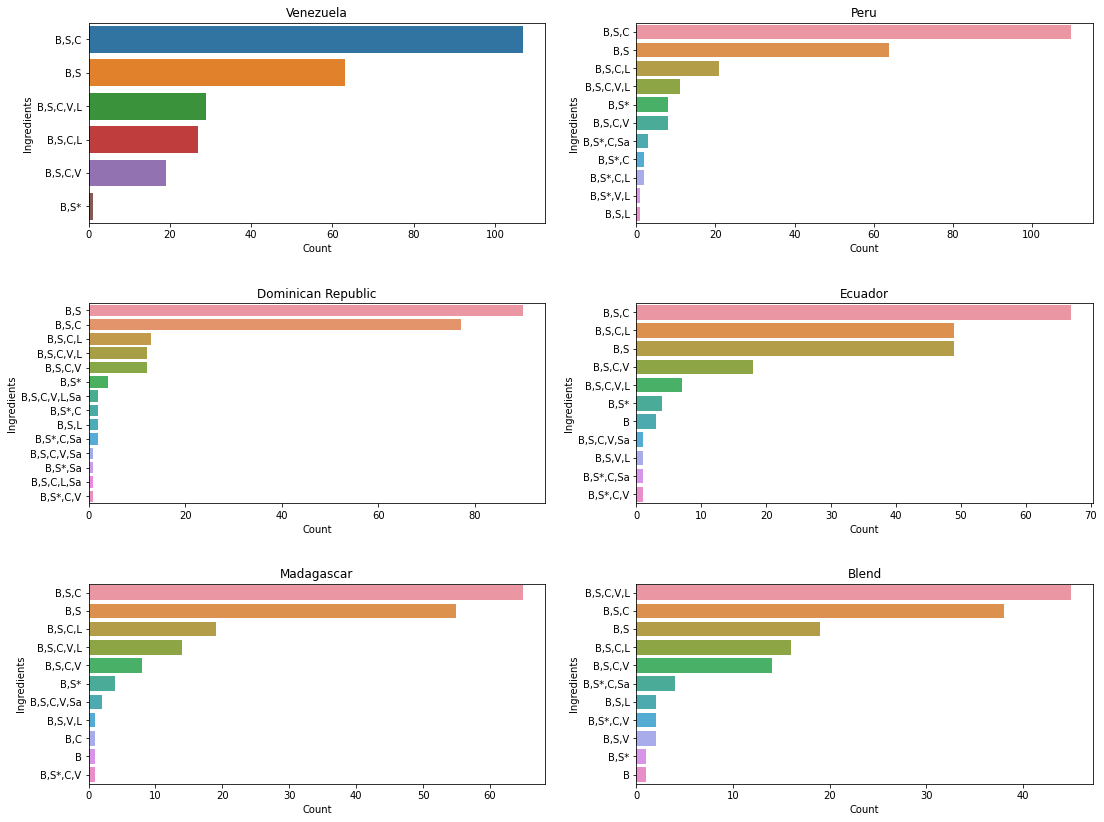

In [ ]:
ingredients_venezuela = pd.DataFrame(df[df['bean_origin'] == 'Venezuela']['ingredients'].value_counts()).reset_index()
ingredients_peru = pd.DataFrame(df[df['bean_origin'] == 'Peru']['ingredients'].value_counts()).reset_index()
ingredients_domrep = pd.DataFrame(df[df['bean_origin'] == 'Dominican Republic']['ingredients'].value_counts()).reset_index()
ingredients_ecuador = pd.DataFrame(df[df['bean_origin'] == 'Ecuador']['ingredients'].value_counts()).reset_index()
ingredients_madagascar = pd.DataFrame(df[df['bean_origin'] == 'Madagascar']['ingredients'].value_counts()).reset_index()
ingredients_blend = pd.DataFrame(df[df['bean_origin'] == 'Blend']['ingredients'].value_counts()).reset_index()
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
sns.barplot(ax=ax0, data=ingredients_venezuela, x='ingredients', y='index')
sns.barplot(ax=ax1, data=ingredients_peru, x='ingredients', y='index')
sns.barplot(ax=ax2, data=ingredients_domrep, x='ingredients', y='index')
sns.barplot(ax=ax3, data=ingredients_ecuador, x='ingredients', y='index')
sns.barplot(ax=ax4, data=ingredients_madagascar, x='ingredients', y='index')
sns.barplot(ax=ax5, data=ingredients_blend, x='ingredients', y='index')
ax0.title.set_text('Venezuela')
ax1.title.set_text('Peru')
ax2.title.set_text('Dominican Republic')
ax3.title.set_text('Ecuador')
ax4.title.set_text('Madagascar')
ax5.title.set_text('Blend')
ax0.set(xlabel='Count', ylabel='Ingredients')
ax1.set(xlabel='Count', ylabel='Ingredients')
ax2.set(xlabel='Count', ylabel='Ingredients')
ax3.set(xlabel='Count', ylabel='Ingredients')
ax4.set(xlabel='Count', ylabel='Ingredients')
ax5.set(xlabel='Count', ylabel='Ingredients')
plt.subplots_adjust(hspace=0.4)

We can see that four countries of origin (Venezuela, Peru, Ecuador and Madagascar) have the **highest average rating of ingredients**, which is Beans, Sugar and Cocoa. Meanwhile Dominican Republic only has Beans and Sugar, and Blend has Beans, Sugar, Cocoa Butter, Vanilla and Lecithin. And the second highest on the plot, every country except Dominican Republic only has **Beans and Sugar**.

## **How many bars were reviewed for each of those countries?**

In [ ]:
# labels
labels_cocoa_percent2 = ['70%', '75%', '72%', '65%', '80%']

In [ ]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
# reviews by country
reviews_country = pd.DataFrame(df.groupby('bean_origin')['review'].sum().reset_index())

# country count - number of reviews
review_count = (reviews_country['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_country.bean_origin)
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviewes by bar name
reviews_bar_name = pd.DataFrame(df.groupby('bar_name')['review'].sum().reset_index())
reviews_bar_name

# bar name - number of reviews
review_count2 = (reviews_bar_name['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_bar_name['bar_name'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviewes by company location
reviews_company_location = pd.DataFrame(df.groupby('company_location')['review'].sum().reset_index())

# company location - number of reviews
review_count3 = (reviews_company_location['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_company_location['company_location'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviews by year reviewed
reviews_year_reviewed = pd.DataFrame(df.groupby('year_reviewed')['review'].sum().reset_index())

# year reviewed - number of reviews
review_count4 = (reviews_year_reviewed['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_year_reviewed['year_reviewed'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviews by cocoa percent
reviews_cocoa_percent = pd.DataFrame(df.groupby('cocoa_percent')['review'].sum().reset_index())

# cocoa percent - number of reviews
review_count5 = (reviews_cocoa_percent['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_cocoa_percent['cocoa_percent'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviews by number of reviews
reviews_num_of_ingredients = pd.DataFrame(df.groupby('num_ingredients')['review'].sum().reset_index())

# num ingredients - number of reviews
review_count6 = (reviews_num_of_ingredients['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_num_of_ingredients['num_ingredients'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviews by ingredients
reviews_ingredients = pd.DataFrame(df.groupby('ingredients')['review'].sum().reset_index())

# ingredients - number of reviews
review_count7 = (reviews_ingredients['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_ingredients['ingredients'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

# reviews by rating
reviews_rating = pd.DataFrame(df.groupby('rating')['review'].sum().reset_index())

# rating - number of reviews
review_count8 = (reviews_rating['review'].str.count(',')
                   .add(1)
                   .groupby(reviews_rating['rating'])
                   .sum()
                   .reset_index(name='num_reviews').nlargest(5, columns='num_reviews'))

In [ ]:
# Venezuela
list_origin_ven = df[df['bean_origin'] == 'Venezuela']['review'].tolist()

split_list_ven = [x for xs in list_origin_ven for x in xs.split(',')]


c_yr = Counter(split_list_ven)
c_yr.most_common(1)
split_result_ven =  (c_yr.most_common(5))

# Peru
list_yr_peru = df[df['bean_origin'] == 'Peru']['review'].tolist()

split_list_yr_peru = [x for xs in list_yr_peru for x in xs.split(',')]

c_yr = Counter(split_list_yr_peru)
c_yr.most_common(1)
split_result_yr_peru =  (c_yr.most_common(5))
split_result_yr_peru

# Dominican Republic
list_origin_domrep = df[df['bean_origin'] == 'Dominican Republic']['review'].tolist()

split_list_domrep = [x for xs in list_origin_domrep for x in xs.split(',')]


c_yr = Counter(split_list_domrep)
c_yr.most_common(1)
split_result_domrep =  (c_yr.most_common(5))
split_result_domrep

# Ecuador
list_origin_ecuador = df[df['bean_origin'] == 'Ecuador']['review'].tolist()

split_list_ecuador = [x for xs in list_origin_ecuador for x in xs.split(',')]


c_yr = Counter(split_list_ecuador)
c_yr.most_common(1)
split_result_ecuador =  (c_yr.most_common(5))
split_result_ecuador

# Madagascar
list_origin_madagascar = df[df['bean_origin'] == 'Madagascar']['review'].tolist()

split_list_madagascar = [x for xs in list_origin_madagascar for x in xs.split(',')]


c_yr = Counter(split_list_madagascar)
c_yr.most_common(1)
split_result_madagascar =  (c_yr.most_common(5))
split_result_madagascar

# Blend
list_origin_blend = df[df['bean_origin'] == 'Blend']['review'].tolist()

split_list_blend = [x for xs in list_origin_blend for x in xs.split(',')]


c_yr = Counter(split_list_blend)
c_yr.most_common(1)
split_result_blend =  (c_yr.most_common(5))
split_result_blend

[(' cocoa', 23),
 (' sweet', 14),
 ('sweet', 13),
 (' bitter', 10),
 ('creamy', 10)]

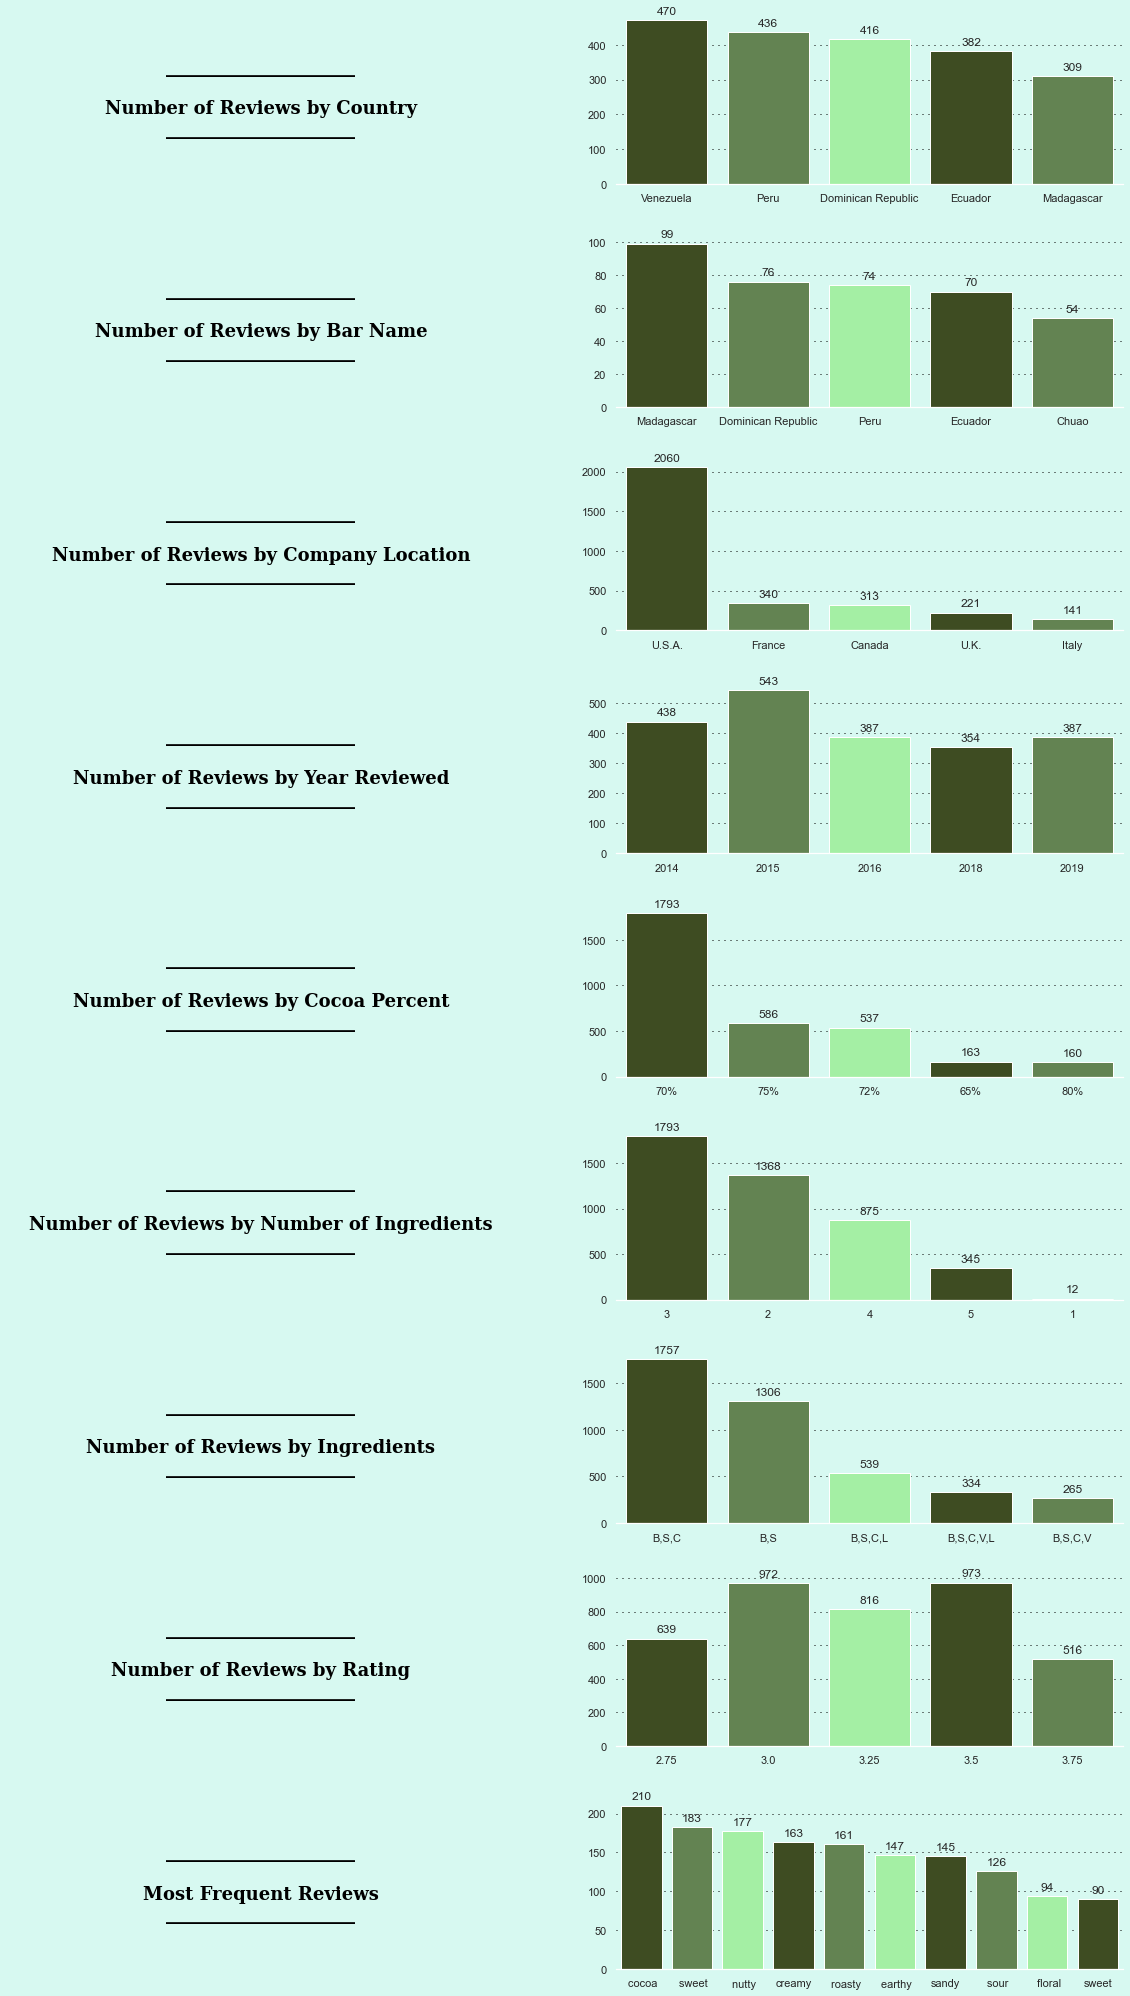

In [ ]:
# subplots
sns.set_style('dark')
fig = plt.figure(figsize=(20, 36))
gs = fig.add_gridspec(9, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[5, 0])
ax11 = fig.add_subplot(gs[5, 1])
ax12 = fig.add_subplot(gs[6, 0])
ax13 = fig.add_subplot(gs[6, 1])
ax14 = fig.add_subplot(gs[7, 0])
ax15 = fig.add_subplot(gs[7, 1])
ax16 = fig.add_subplot(gs[8, 0])
ax17 = fig.add_subplot(gs[8, 1])

# colors
background_color = '#D7F9F1'
color_pallete = ['#40531B', '#618B4A', '#98FB98']

# setting up colors
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)
ax16.set_facecolor(background_color)
ax17.set_facecolor(background_color)

# Title of the plot
# Title - Country
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Country\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Bar Name
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Bar Name\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Company Location
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Company Location\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Year Reviewed
ax6.spines['bottom'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Year Reviewed\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Cocoa Percent
ax8.spines['bottom'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Cocoa Percent\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Number of Ingredients
ax10.spines['bottom'].set_visible(False)
ax10.spines['left'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.tick_params(left=False, bottom=False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Number of Ingredients\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Ingredients
ax12.spines['bottom'].set_visible(False)
ax12.spines['left'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax12.tick_params(left=False, bottom=False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Ingredients\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Rating
ax14.spines['bottom'].set_visible(False)
ax14.spines['left'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)
ax14.tick_params(left=False, bottom=False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.text(0.5, 0.5,
        '_____________________\n\nNumber of Reviews by Rating\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Title - Most Frequent Reviews
ax16.spines['bottom'].set_visible(False)
ax16.spines['left'].set_visible(False)
ax16.spines['top'].set_visible(False)
ax16.spines['right'].set_visible(False)
ax16.tick_params(left=False, bottom=False)
ax16.set_xticklabels([])
ax16.set_yticklabels([])
ax16.text(0.5, 0.5,
        '_____________________\n\nMost Frequent Reviews\n_____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold',
        fontfamily='serif',
        color='#000000')

# Number of Reviews by Country
ax1.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax1, data=review_count, x='bean_origin', y='num_reviews', palette=color_pallete)
ax1.set_xlabel('')
ax1.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Number of Reviewes by Bar Name
ax3.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax3, data=review_count2, x='bar_name', y='num_reviews', palette=color_pallete)
ax3.set_xlabel('')
ax3.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Number of Reviews by Company Location
ax5.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax5, data=review_count3, x='company_location', y='num_reviews', palette=color_pallete)
ax5.set_xlabel('')
ax5.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Number of Reviews by Year Reviewed
ax7.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax7, data=review_count4, x='year_reviewed', y='num_reviews', palette=color_pallete)
ax7.set_xlabel('')
ax7.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Number of Reviews by Cocoa Percent
ax9.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax9, data=review_count5, x=labels_cocoa_percent2, y='num_reviews', palette=color_pallete)
ax9.set_xlabel('')
ax9.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Number of Reviews by Number of Ingredients
ax11.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax11, data=review_count6, x=labels_num, y='num_reviews', palette=color_pallete)
ax11.set_xlabel('')
ax11.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Number of Reviews by Ingredients
ax13.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax13, data=review_count7, x='ingredients', y='num_reviews', palette=color_pallete)
ax13.set_xlabel('')
ax13.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Number of Reviews by Rating
ax15.text(1.4, 3.5, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax15, data=review_count8, x='rating', y='num_reviews', palette=color_pallete)
ax15.set_xlabel('')
ax15.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Most Frequent Reviews
ax17.text(1.4, 3.7, '', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax17.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
splot = sns.barplot(ax=ax17, data=split_result_df, x='review', y='counter', palette=color_pallete)
ax17.set_xlabel('')
ax17.set_ylabel('')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Removing spines
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
    ax10.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
    ax12.spines[s].set_visible(False)
    ax13.spines[s].set_visible(False)
    ax14.spines[s].set_visible(False)
    ax15.spines[s].set_visible(False)
    ax16.spines[s].set_visible(False)
    ax17.spines[s].set_visible(False)
    
plt.subplots_adjust(hspace=0.3)
ax0.grid(False)
ax2.grid(False)
ax4.grid(False)
ax6.grid(False)
ax8.grid(False)
ax10.grid(False)
ax12.grid(False)
ax14.grid(False)
ax16.grid(False)

### **Number of Reviews by Country**
We can see that the most number of reviews is Venezuela, which is expected, since a lot of beans come from Venezuela. I counted all reviews separated with a comma.

### **Number of Reviews by Bar Name**
Madagascar has the most number of reviews, which is again, expected. A lot of chocolates are coming from Madagascar with its name.

### **Number of Reviews by Company Location**
As I've said before, U.S.A. is a location of over dozens of bean origins! Therefore it's expected that U.S.A has the most amount of reviews.

### **Number of Reviews by Cocoa Percent**
Same with cocoa percent, most of the chocolate has 70% of cocoa. Seems like that's a perfect amount of cocoa.

### **Number of Reviews by Number of Ingredients**
The most chocolate with reviews has 3 ingredients.

### **Number of Reviews by Ingredients**
The most popular ingredients, Beans, Sugar and Cocoa. With Beans and Sugar following right after it.

### **Number of Reviews by Rating**
Rates between 3.0 and 3.5 is the perfect spot for a chocolate.

### **Most Frequent Reviews**
'Cocoa' is the word that most people use when reviewing chocolate! Following it is sweet, and nutty. Which is most likely connected to the 2 most used ingredients, Sugar and Cocoa.

## **Is the cacao bean's origin an indicator of quality?**

In [ ]:
# number of 4.00 ratings
rating400_venezuela = len(df.loc[(df['bean_origin'] == 'Venezuela') & (df['rating'] == 4.0)])
rating400_peru = len(df.loc[(df['bean_origin'] == 'Peru') & (df['rating'] == 4.0)])
rating400_domrep = len(df.loc[(df['bean_origin'] == 'Dominican Republic') & (df['rating'] == 4.0)])
rating400_ecuador = len(df.loc[(df['bean_origin'] == 'Ecuador') & (df['rating'] == 4.0)])
rating400_madagascar = len(df.loc[(df['bean_origin'] == 'Madagascar') & (df['rating'] == 4.0)])

# number of countries shown
num_venezuela = len(df[df['bean_origin'] == 'Venezuela'])
num_peru = len(df[df['bean_origin'] == 'Peru'])
num_domrep = len(df[df['bean_origin'] == 'Dominican Republic'])
num_ecuador = len(df[df['bean_origin'] == 'Ecuador'])
num_madagascar = len(df[df['bean_origin'] == 'Madagascar'])

# percentage of 4.00 ratings in each country
percent_venezuela = rating400_venezuela / num_venezuela * 100
percent_peru = rating400_peru / num_peru * 100
percent_domrep = rating400_domrep / num_domrep * 100
percent_ecuador = rating400_ecuador / num_ecuador * 100
percent_madagascar = rating400_madagascar / num_madagascar * 100
percent_labels = ['Venezuela', 'Peru', 'Dominican Republic', 'Ecuador', 'Madagascar']
percent_list = [percent_venezuela, percent_peru, percent_domrep, percent_ecuador, percent_madagascar]

Text(0.5, 1.0, 'Percentage of 4.00 Rating')

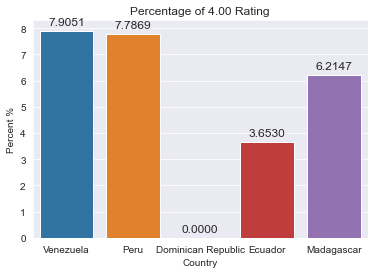

In [ ]:
sns.set_style('darkgrid')
splot = sns.barplot(x=percent_labels, y=percent_list)
sns.set(rc={'figure.figsize':(8, 8)})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
splot.set(xlabel='Country', ylabel='Percent %')
splot.set_title('Percentage of 4.00 Rating')

Let's first summarize what each **quality** of the best chocolate is, based on visualizations above. First, let's list the best top five countries. **Venezuela, Peru, Dominican Republic, Ecuador, and Madagascar.** What do all of these countries have in common?

- For starters, they are all grouped in between 3.00 and 3.30 of average rating, pretty close to each other. Venezuela has the country the highest number of 4.00 ratings, which is 20. And Peru, with 19. The only one without a single 4.00 rating is Dominican Republic. Venezuela also has the highest number of of chocolates made in this dataset.

- Each of those countries have a company located in U.S.A.

- In each of those top five countries, the most used percent for a chocolate is 70%.

- The highest average rating for ingredients is Beans, Sugar and Cocoa. Also the most used combination.

- Only Venezuela has two chocolates listed in the highest average rating, out of 6.

- Most frequent reviews are: cocoa, sweet, nutty, creamy.

The best qualities a chocolate have is:
- **Beans, Sugar, and Cocoa**
- **70% of cocoa**
- **Sweet, nutty, and creamy**
- **From Venezuela**

To answer the question, cacao bean's origin indeed is an indicator of quality.

In [ ]:
print('Number of 4.00 ratings in Venezuela: ' + str(len(df.loc[(df.bean_origin == 'Venezuela') & (df.rating == 4.0)])))
print('Number of 4.00 ratings in Peru: ' + str(len(df.loc[(df.bean_origin == 'Peru') & (df.rating == 4.0)])))
print('Number of 4.00 ratings in Dominican Republic: ' + str(len(df.loc[(df.bean_origin == 'Dominican Republic') & (df.rating == 4.0)])))
print('Number of 4.00 ratings in Ecuador: ' + str(len(df.loc[(df.bean_origin == 'Ecuador') & (df.rating == 4.0)])))
print('Number of 4.00 ratings in Madagascar: ' + str(len(df.loc[(df.bean_origin == 'Madagascar') & (df.rating == 4.0)])))

Number of 4.00 ratings in Venezuela: 20
Number of 4.00 ratings in Peru: 19
Number of 4.00 ratings in Dominican Republic: 0
Number of 4.00 ratings in Ecuador: 8
Number of 4.00 ratings in Madagascar: 11


In [ ]:
print('Number of rows in Venezuela: ' + str(len(df[df['bean_origin'] == 'Venezuela'])))
print('Number of rows in Peru: ' + str(len(df[df['bean_origin'] == 'Peru'])))
print('Number of rows in Dominican Republic: ' + str(len(df[df['bean_origin'] == 'Dominican Republic'])))
print('Number of rows in Ecuador: ' + str(len(df[df['bean_origin'] == 'Ecuador'])))
print('Number of rows in Madagascar: ' + str(len(df[df['bean_origin'] == 'Madagascar'])))

Number of rows in Venezuela: 253
Number of rows in Peru: 244
Number of rows in Dominican Republic: 226
Number of rows in Ecuador: 219
Number of rows in Madagascar: 177


# **Best Chocolate Bars**

In [ ]:
best_chocolate_bars = df.loc[(df['ingredients'] == 'B,S,C') & (df['rating'] >= 3.0) & (df['rating'] <=3.5) & (df['company_location'] == 'U.S.A.')
                            & (df['cocoa_percent'] == 70)]
best_chocolate_bars

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
71,2044,Altus aka Cao Artisan,U.S.A.,2018,Dominican Republic,Oko Caribe,70.0,3.0,"B,S,C","sweet, coarse, nutty",3.00
130,1904,Arete,U.S.A.,2016,Ecuador,Hacienda Victoria,70.0,3.0,"B,S,C","sticky, floral, roasty",3.25
131,1904,Arete,U.S.A.,2016,Ecuador,Costa Esmeraldas,70.0,3.0,"B,S,C","chewy, mild floral",3.25
144,2020,Arete,U.S.A.,2017,Madagascar,Sambirano Valley,70.0,3.0,"B,S,C",sour fruit,3.50
146,2028,Arete,U.S.A.,2017,Peru,Ucayali,70.0,3.0,"B,S,C","dried fruit, fig, anise",3.50
...,...,...,...,...,...,...,...,...,...,...,...
2488,1574,Zak's,U.S.A.,2015,Papua New Guinea,"Papua New Guinea, Batch 2",70.0,3.0,"B,S,C","heavy smoke, fruit, ham",3.00
2490,1578,Zak's,U.S.A.,2015,Dominican Republic,"Dominican Republic, Batch D2",70.0,3.0,"B,S,C","nutty, earthy, hammy",3.25
2491,1578,Zak's,U.S.A.,2015,Madagascar,"Madagascar, Batch 2",70.0,3.0,"B,S,C","sandy, mild sour, mild fruit",3.25
2492,1578,Zak's,U.S.A.,2015,Peru,"Peru, Batch 1",70.0,3.0,"B,S,C","sandy, nutty, mocha",3.25
